# Lecture 1 Assignment

- Name: *Kenneth Cahilog*
- ID number: *23104856*
- Course: *Bachelor of Science in Computer Science*

## Graph

A graph $G$ is a collection of nodes (or vertices) and edges (or links) connecting pairs of nodes. A graph can be visualized as a set of points (nodes) connected by lines (edges).

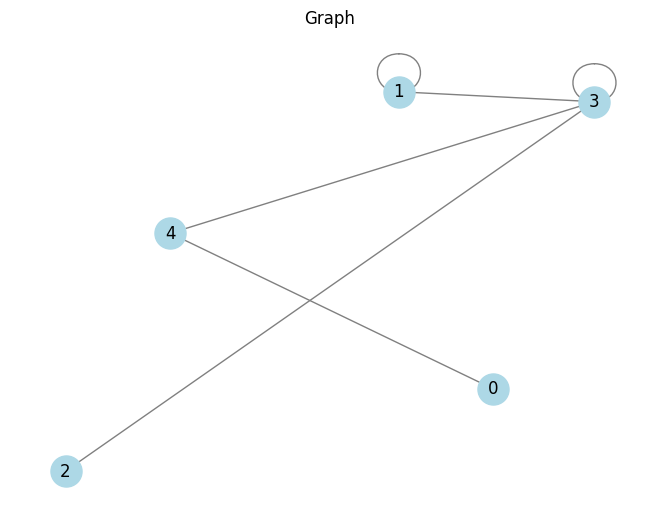

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Set seed
import random
import numpy as np
seed = 100
random.seed(seed)
np.random.seed(seed)

nodes = 5
edges = 4

# Helper function to draw a graph
def draw_graph(G, title, node_color='lightblue', edge_color='gray', show=True):
    pos = nx.random_layout(G, seed=seed)
    nx.draw(G, pos=pos, with_labels=True, node_color=node_color, node_size=500, edge_color=edge_color)
    plt.title(title)
    if show:
        plt.show()

graph = nx.gnm_random_graph(nodes, edges)
graph.add_edges_from([(1, 1), (3, 3)])
draw_graph(graph, "Graph")

## Directed Graph

A directed graph (or digraph) is similar to a graph, but the edges have a direction, indicated by an arrow. This means that the relationship between nodes is one-way.

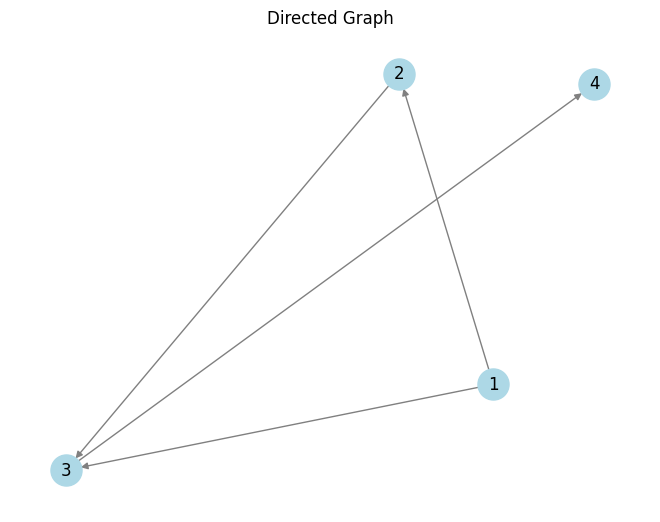

In [2]:
digraph = nx.DiGraph()
digraph.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4)])
draw_graph(digraph, "Directed Graph")

## Simple Graph

A simple graph is an unweighted, undirected graph containing no loops or multiple edges between the same pair of nodes.

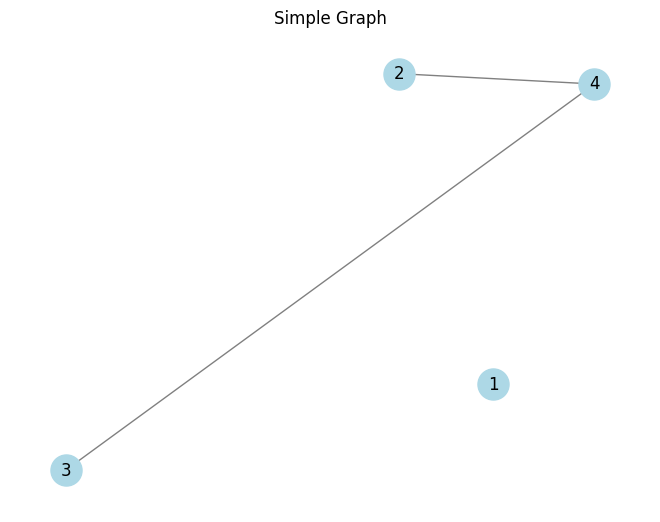

In [3]:
simple_graph = nx.Graph()
simple_graph.add_nodes_from([1, 2, 3, 4])
simple_graph.add_edges_from([(2, 4), (3, 4)])
draw_graph(simple_graph, "Simple Graph")

## Complete Graph

A complete graph is a simple graph in which there is a unique edge connecting every pair of distinct vertices.

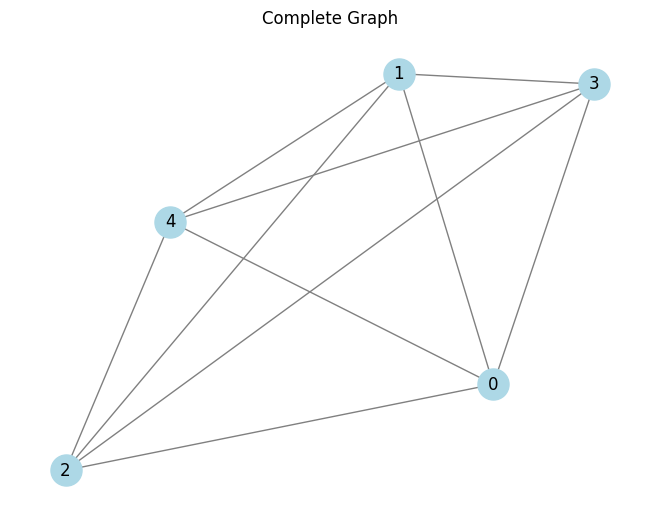

In [4]:
complete_graph = nx.complete_graph(5)
draw_graph(complete_graph, "Complete Graph")

## Bipartite Graph

A bipartite graph is a graph whose nodes can be divided into two disjoint sets such that no two graph vertices within the same set are adjacent.

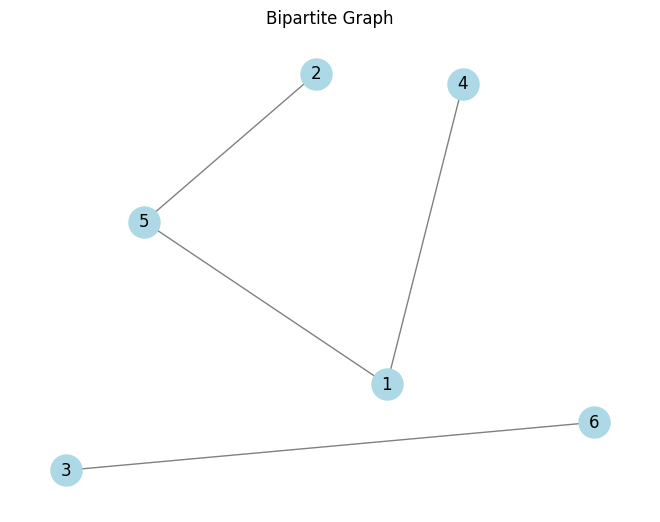

In [5]:
bigraph = nx.Graph()
bigraph.add_nodes_from([1, 2, 3], bipartite=0)
bigraph.add_nodes_from([4, 5, 6], bipartite=1)
bigraph.add_edges_from([(1, 4), (1, 5), (2, 5), (3, 6)])
draw_graph(bigraph, "Bipartite Graph")

## Subgraph

A subgraph is a graph formed from a subset of the vertices and edges of another graph (in this case, the complete graph above).

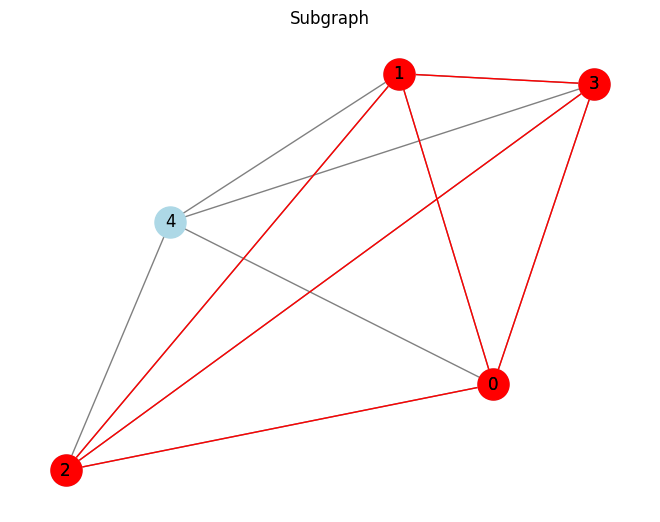

In [6]:
subgraph = complete_graph.subgraph([0, 1, 2, 3])
draw_graph(complete_graph, "Subgraph", show=False)
draw_graph(subgraph, "Subgraph",  node_color='red', edge_color='red')

## Degree of a Vertex

The degree of a vertex is the number of edges connected to it. In a directed graph, you have in-degree (edges coming in) and out-degree (edges going out).

In [7]:
print("Degree of vertex 1 of the subgraph above:", subgraph.degree[1])
print("Degree of vertex 2 of the subgraph above:", subgraph.degree[2])

Degree of vertex 1 of the subgraph above: 3
Degree of vertex 2 of the subgraph above: 3


## The Handshake Theorem

The handshake theorem states that in any undirected graph, the sum of all vertex degrees is twice the number of edges.

In [8]:
total_degree = sum(dict(subgraph.degree).values())
print("Sum of all degrees of the subgraph above:", total_degree)
print("Number of edges of the subgraph above times 2:", 2 * subgraph.number_of_edges())

Sum of all degrees of the subgraph above: 12
Number of edges of the subgraph above times 2: 12


## Travelling in a Graph

Shortest path from 1 to 4: [1, 3, 4]


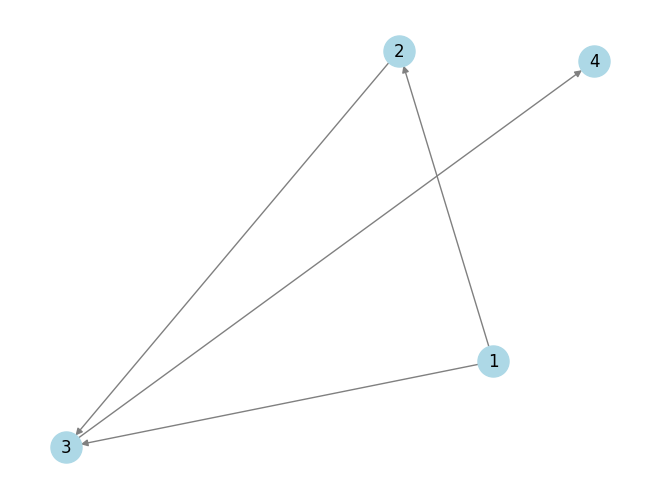

In [9]:
path = nx.shortest_path(digraph, source=1, target=4)
print("Shortest path from 1 to 4:", path)
draw_graph(digraph, "", show=False)

## Connectedness of a Graph

A graph is connected if there is a path between any two vertices. If a graph is not connected, it is made up of multiple disconnected subgraphs called connected components.

Is the graph connected? False


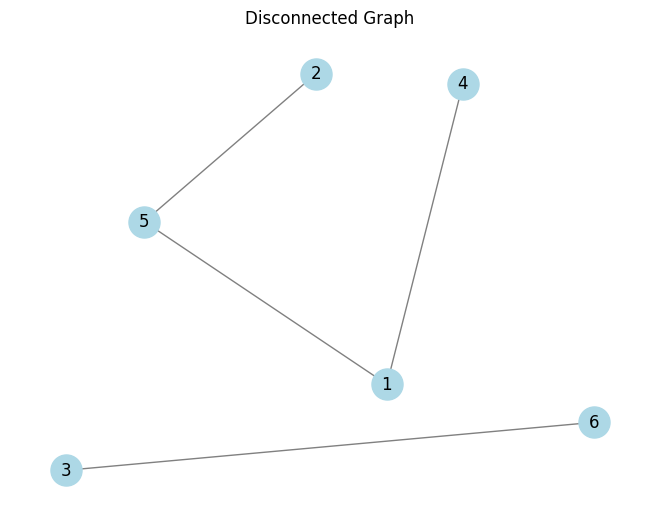

In [10]:
is_connected = nx.is_connected(bigraph)
print("Is the graph connected?", is_connected)
draw_graph(bigraph, "Disconnected Graph")

Is the graph connected? True


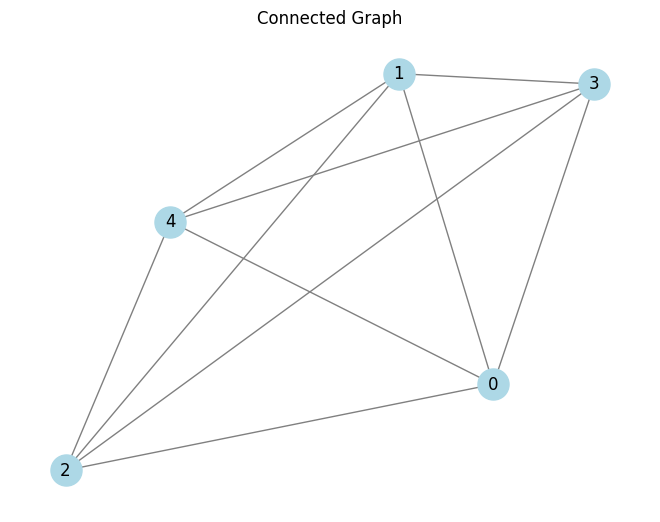

In [11]:
is_connected = nx.is_connected(complete_graph)
print("Is the graph connected?", is_connected)
draw_graph(complete_graph, "Connected Graph")

## Connected Component

A connected component of a graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.

Connected components: [{1}, {2, 3, 4}]


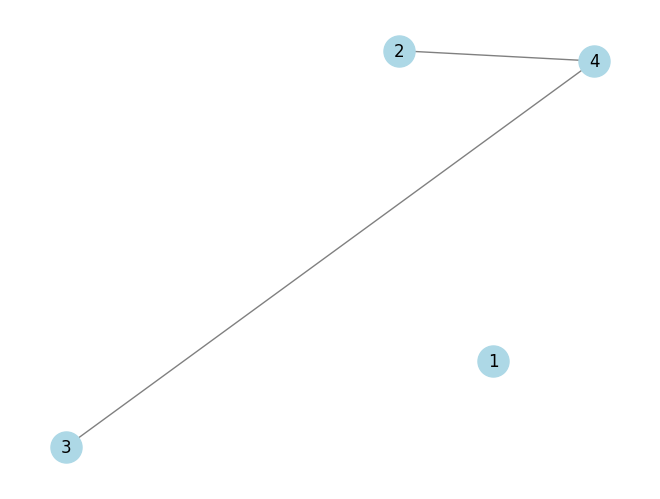

In [12]:
components = list(nx.connected_components(simple_graph))
print("Connected components:", components)
draw_graph(simple_graph, "")

## Euler's Circuit

An Eulerian circuit (or Eulerian cycle) is a cycle in a graph that visits every edge exactly once and returns to the starting vertex. For a graph to have an Eulerian circuit, it must be connected and all vertices must have an even degree.

Euler's circuit: [0, 4, 3, 2, 1, 0]


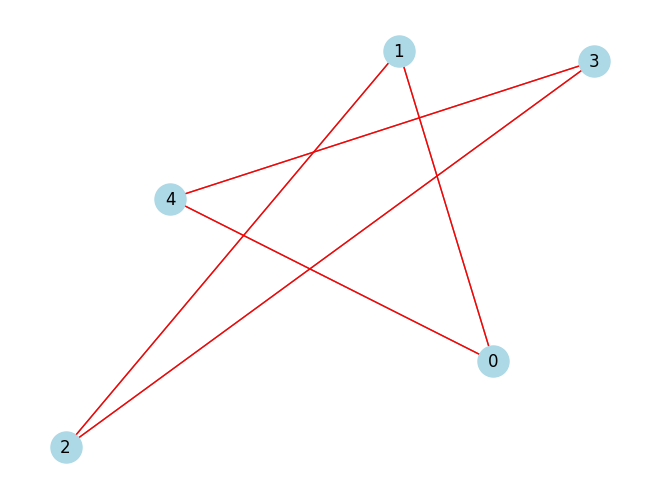

In [52]:
cycle_graph = nx.cycle_graph(5)
eulerian_circuit = nx.eulerian_circuit(cycle_graph)
draw_graph(cycle_graph, "", show=False)
edge_list = [(u, v) for u, v in eulerian_circuit]
nx.draw_networkx_edges(cycle_graph, pos=nx.random_layout(cycle_graph, seed=seed), edgelist=edge_list, edge_color='red')
print("Euler's circuit:", [u for u, v in edge_list] + [edge_list[-1][1]])
plt.show()

## Euler's Trail

An Eulerian trail (or Eulerian path) is a path in a graph that visits every edge exactly once. A graph has an Eulerian trail if and only if it has exactly zero or two vertices of odd degree.

Euler's trail: [(1, 2), (2, 3), (3, 4), (4, 5), (5, 2)]


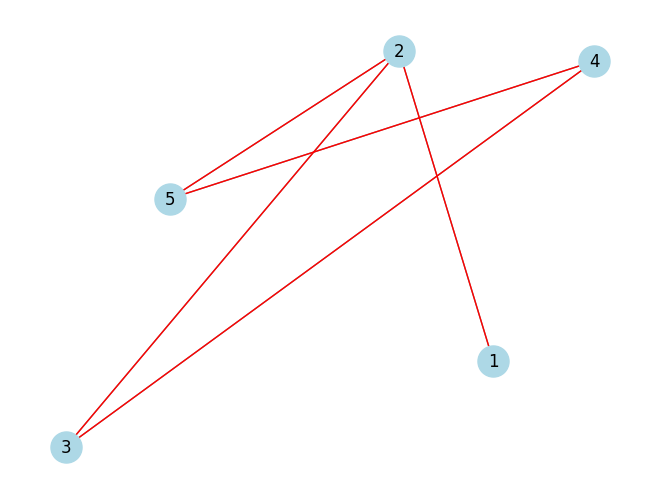

In [42]:
graph = nx.Graph()
graph.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (2, 5)])
nx.eulerize(graph)
if nx.has_eulerian_path(graph):
    eulerian_path = nx.eulerian_path(graph)
    draw_graph(graph, "", show=False)
    edge_list = [(u, v) for u, v in eulerian_path]
    nx.draw_networkx_edges(graph, pos=nx.random_layout(graph, seed=seed), edgelist=edge_list, edge_color='red')
    print("Euler's trail:", edge_list)
    plt.show()

## Hamiltonian Circuit

A Hamiltonian circuit (or Hamiltonian cycle) is a cycle that visits every vertex exactly once and returns to the starting vertex. Unlike Eulerian circuits, there is no simple criterion to check for the existence of a Hamiltonian circuit.

Hamiltonian Circuit: [0, 3, 2, 4, 1, 0]


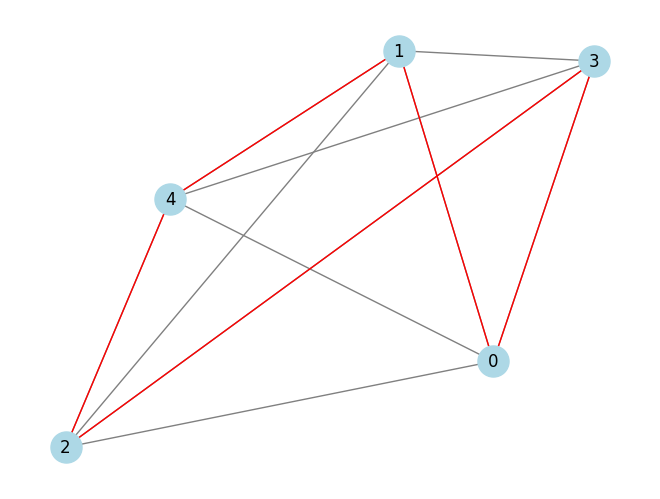

In [27]:
hamiltonian_circuit = nx.approximation.traveling_salesman_problem(complete_graph, cycle=True)
print("Hamiltonian Circuit:", hamiltonian_circuit)
hamiltonian_edges = [(hamiltonian_circuit[i], hamiltonian_circuit[i+1]) for i in range(len(hamiltonian_circuit) - 1)]
draw_graph(complete_graph, "", show=False)
nx.draw_networkx_edges(complete_graph, pos=nx.random_layout(complete_graph, seed=seed), edgelist=hamiltonian_edges, edge_color='red')
plt.show()

## The Travelling Salesman Problem

The Travelling Salesman Problem (TSP) is a classic optimization problem that seeks the shortest possible route that visits each vertex exactly once and returns to the origin vertex. It is NP-hard, meaning no known algorithm can solve all instances of this problem quickly (i.e., in polynomial time). See the graph above for an example.